<a href="https://colab.research.google.com/github/Judysonandrade/Agrupamento---ANALISE-EXPLORATORIA-DE-DADOS-DE-LOW-GRADE-GLIOMA/blob/main/Agrupamento%20-%20ANALISE-EXPLORATORIA-DE-DADOS-DE-LOW-GRADE-GLIOMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
S# utilizar os Dataframes do Pandas para manipular as instâncias
import pandas as pd
# matplotlib para visualizar
import matplotlib.pyplot as plt
# gdown para baixar os dados
import gdown
plt.style.use('ggplot')
import numpy as np
import seaborn as sns

Conversão das variaveis para numericas (Feitas no Rstudio)

1. Primeiro Bloco:

 - first_symptom_longest_duration

 - histologic_diagnosis

 - tumor_grade

 - laterality

 - tumor_site

 - race

 - gender

 - history_other_malignancy

2. Segundo bloco

 - history_neoadjuvant_treatment

 - history_ionizing_rt_to_head

 - symp_changes_mental_status, symp_changes_visual, symp_changes_sensory

 - history_neoadjuvant_steroid_tx

 - tumor_status

 - family_history_brain_tumor

In [ ]:
url = 'https://drive.google.com/file/d/1PBzN7R1PB89rulNjCE66pClfKe03uppw/view?usp=sharing'
output = 'lgg.clinicCLUSTER.csv'
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1PBzN7R1PB89rulNjCE66pClfKe03uppw
To: /content/lgg.clinicCLUSTER.csv
100%|██████████| 48.3k/48.3k [00:00<00:00, 47.9MB/s]


'lgg.clinicCLUSTER.csv'

In [ ]:
df2 = pd.read_csv("/content/lgg.clinicCLUSTER.csv")
df2.head()

,bcr_patient_barcode,histologic_diagnosis,tumor_grade,laterality,tumor_site,race,history_neoadjuvant_treatment,initial_pathologic_dx_year,history_ionizing_rt_to_head,history_seizures,...,radiation_treatment_adjuvant,pharmaceutical_tx_adjuvant,treatment_outcome_first_course,new_tumor_event_dx_indicator,age_at_initial_pathologic_diagnosis,patient_id,tissue_source_site,gender.y,history_other_malignancy,tumor_status
0,TCGA-CS-4938,1,2,4,4,5,1,14,2,3,...,1,1,1,1,16,4938,CS,2,1,1
1,TCGA-CS-4941,1,3,4,4,5,1,14,2,1,...,1,1,1,1,52,4941,CS,1,1,3
2,TCGA-CS-4942,1,3,4,4,4,1,15,2,3,...,1,1,1,1,29,4942,CS,2,1,3
3,TCGA-CS-4943,1,3,2,4,5,1,18,2,3,...,1,1,1,1,22,4943,CS,1,1,3
4,TCGA-CS-4944,1,2,4,8,5,1,19,2,1,...,1,1,1,1,35,4944,CS,1,1,3


In [ ]:
url = 'https://drive.google.com/file/d/1j6iXcVuuvExQeLsm3ZOfBa-GnRy7aQWQ/view?usp=sharing'
output = 'lgg.clinicCLUSTERIZADO.csv'
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1j6iXcVuuvExQeLsm3ZOfBa-GnRy7aQWQ
To: /content/lgg.clinicCLUSTERIZADO.csv
100%|██████████| 39.6k/39.6k [00:00<00:00, 46.4MB/s]


'lgg.clinicCLUSTERIZADO.csv'

In [ ]:
df = pd.read_csv("/content/lgg.clinicCLUSTERIZADO.csv")
df.head()


,histologic_diagnosis,tumor_grade,laterality,tumor_site,race,history_neoadjuvant_treatment,initial_pathologic_dx_year,history_ionizing_rt_to_head,history_seizures,history_headaches,...,pharmaceutical_tx_adjuvant,treatment_outcome_first_course,new_tumor_event_dx_indicator,age_at_initial_pathologic_diagnosis,tissue_source_site,gender.y,history_other_malignancy,tumor_status,cluster,count_days
0,1,2,4,4,5,1,14,2,3,2,...,1,1,1,16,1,2,1,1,2,58
1,1,3,4,4,5,1,14,2,1,3,...,1,1,1,52,1,1,1,3,4,35
2,1,3,4,4,4,1,15,2,3,2,...,1,1,1,29,1,2,1,3,3,8
3,1,3,2,4,5,1,18,2,3,3,...,1,1,1,22,1,1,1,3,4,225
4,1,2,4,8,5,1,19,2,1,2,...,1,1,1,35,1,1,1,3,2,179


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Copiar o DataFrame
df_normalizado = df.copy()

# Identificar colunas numéricas (float ou int)
colunas_numericas = df_normalizado.select_dtypes(include=['int64', 'float64']).columns

# Excluir a coluna 'cluster' (não deve ser normalizada)
colunas_para_normalizar = colunas_numericas.drop('cluster')

# Aplicar normalização Min-Max
scaler = MinMaxScaler()
df_normalizado[colunas_para_normalizar] = scaler.fit_transform(df_normalizado[colunas_para_normalizar])


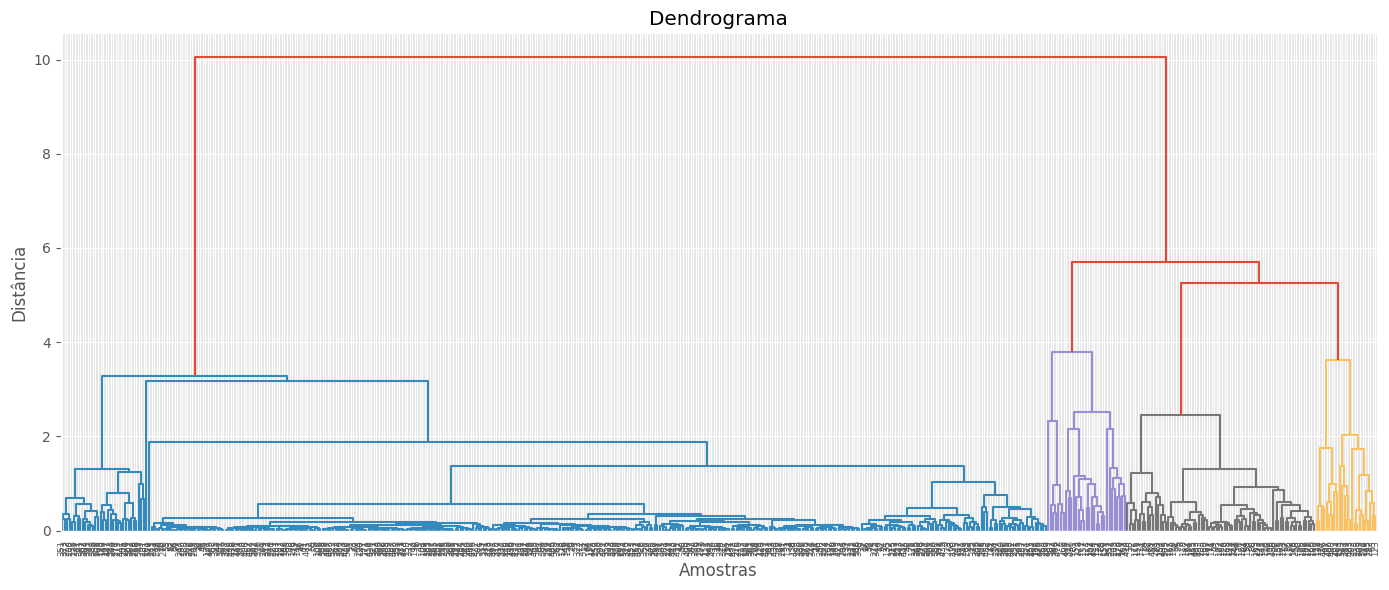

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

# 1. Calcula similaridade com distância cosseno
similarity_distance = 1 - cosine_similarity(df.select_dtypes(include='number'))

# 2. Aplica linkage
mergings = linkage(similarity_distance, method='average')

# 3. Plota dendrograma
plt.figure(figsize=(14, 6))  # aumenta o tamanho
dendrogram(
    mergings,
    leaf_rotation=90,
    leaf_font_size=6,         # reduz tamanho da fonte
    color_threshold=5.0       # ajusta o corte para destacar agrupamentos
)
plt.title("Dendrograma")
plt.xlabel("Amostras")
plt.ylabel("Distância")
plt.tight_layout()
plt.show()

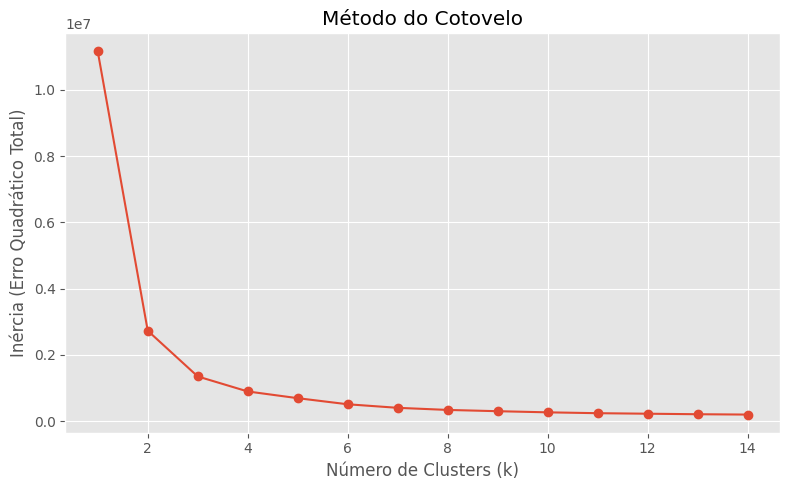

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Seleciona apenas colunas numéricas
X = df.select_dtypes(include='number').dropna()

# 2. Lista de valores de k
ks = range(1, 15)
inertias = []

# 3. Testa diferentes valores de k
for k in ks:
    km = KMeans(n_clusters=k, random_state=8, n_init=10)  # substitui 'auto' por 10 para compatibilidade
    km.fit(X)
    inertias.append(km.inertia_)

# 4. Plota o gráfico do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(ks, inertias, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (Erro Quadrático Total)')
plt.grid(True)
plt.tight_layout()
plt.show()

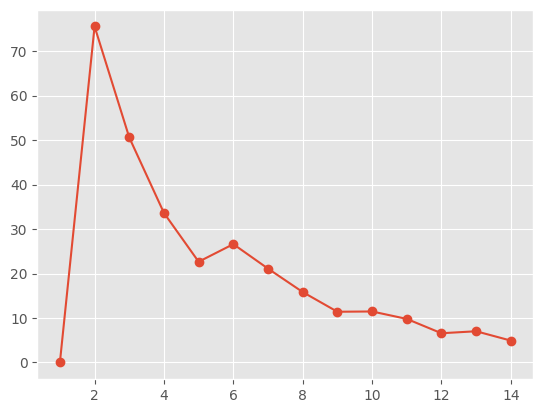

In [ ]:
diff = [(1 - (inertias[i] / inertias[i-1]))*100 if i > 0 else 0 for i in range(0,len(inertias))]
plt.plot(range(1,len(diff)+1), diff, marker='o')

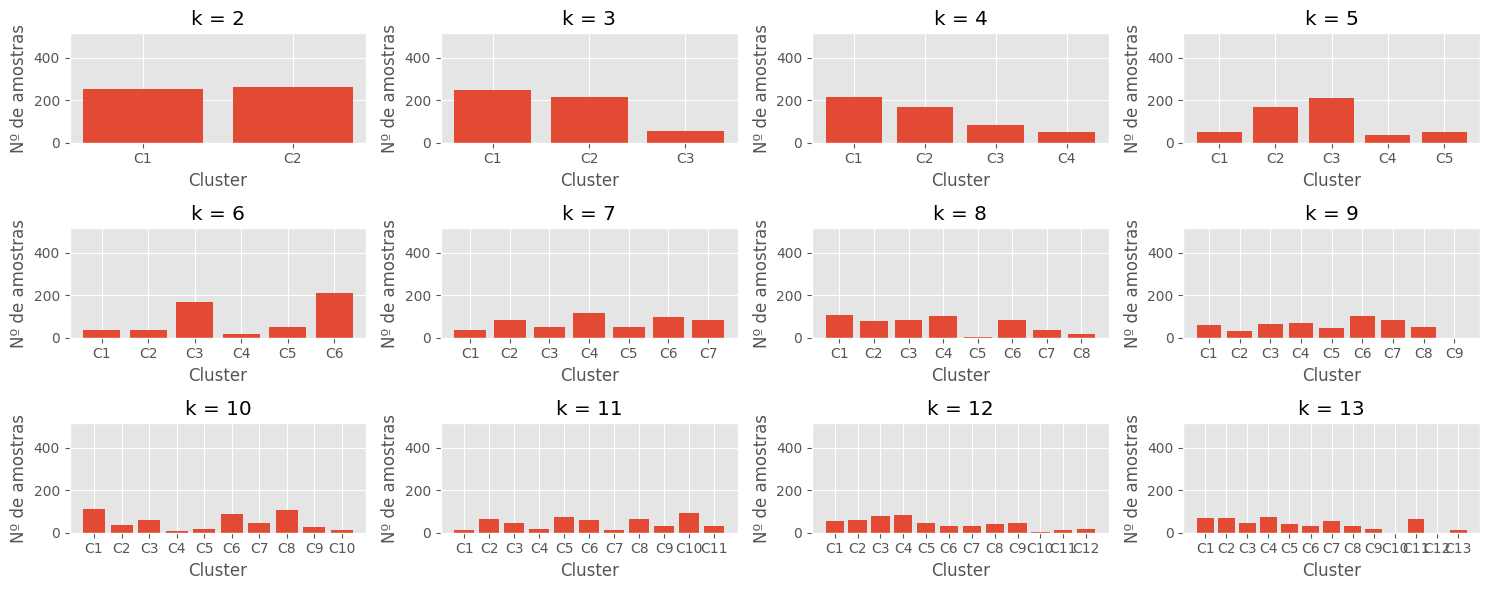

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

num_cols = df.select_dtypes("number").columns
X = df[num_cols].dropna()
X_scaled = StandardScaler().fit_transform(X)
ks = range(2, 14)
fig, axs = plt.subplots(3, 4, figsize=(15, 6), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, k in enumerate(ks):
    km = KMeans(n_clusters=k, random_state=8, n_init=10)
    labels = km.fit_predict(X_scaled)

    _, counts = np.unique(labels, return_counts=True)

    axs[i].bar(range(k), counts, tick_label=[f"C{j+1}" for j in range(k)])
    axs[i].set_title(f"k = {k}")
    axs[i].set_ylim(0, X.shape[0])
    axs[i].set_xlabel("Cluster")
    axs[i].set_ylabel("Nº de amostras")

plt.tight_layout()
plt.show()

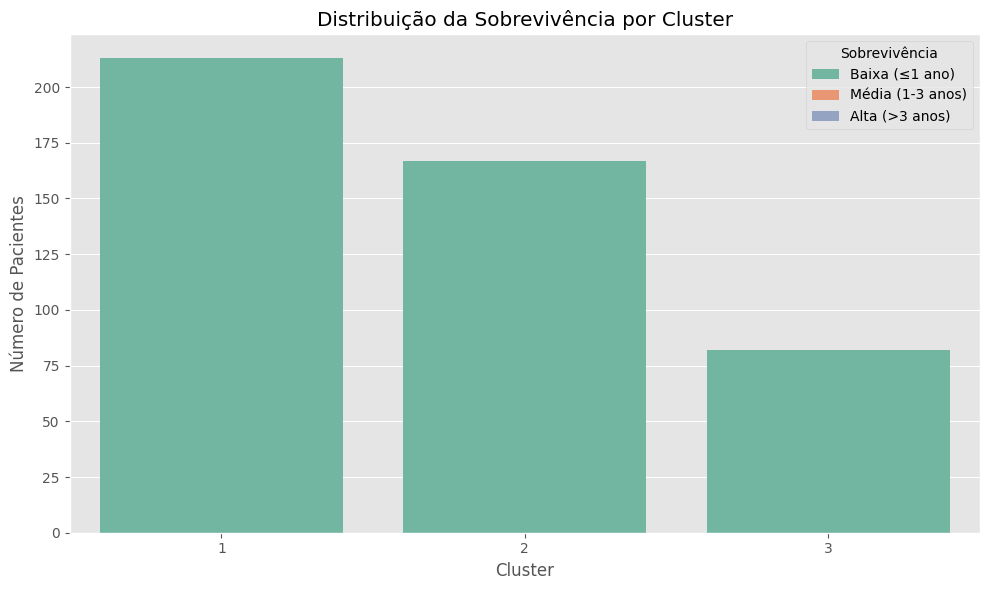

In [ ]:
df['survival_status'] = pd.cut(
    df['death_days_to'],
    bins=[-1, 365, 1095, float('inf')],
    labels=['Baixa (≤1 ano)', 'Média (1-3 anos)', 'Alta (>3 anos)']
)

# Filtra apenas os clusters desejados
df_subset = df[df['cluster'].isin([1, 2, 3])]

# Gráfico de barras: Cluster vs. Sobrevivência (apenas para 3 clusters)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_subset, x='cluster', hue='survival_status', palette='Set2')

plt.title("Distribuição da Sobrevivência por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Número de Pacientes")
plt.legend(title="Sobrevivência")
plt.tight_layout()
plt.show()

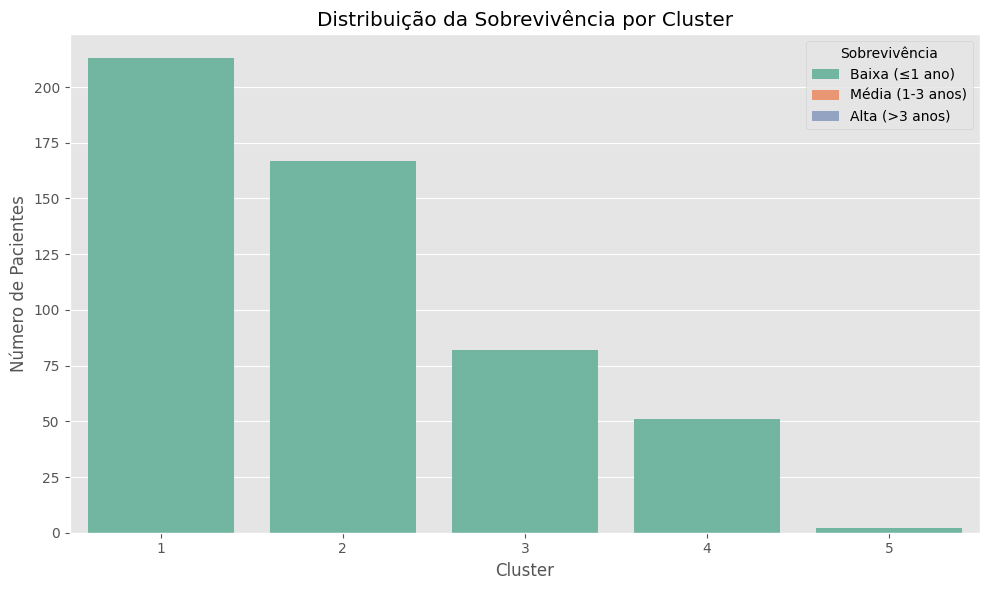

In [ ]:
df['survival_status'] = pd.cut(
    df['death_days_to'],
    bins=[-1, 365, 1095, float('inf')],
    labels=['Baixa (≤1 ano)', 'Média (1-3 anos)', 'Alta (>3 anos)']
)

# Filtra apenas os clusters desejados
df_subset = df[df['cluster'].isin([1, 2, 3,4,5])]

# Gráfico de barras: Cluster vs. Sobrevivência (apenas para 3 clusters)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_subset, x='cluster', hue='survival_status', palette='Set2')

plt.title("Distribuição da Sobrevivência por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Número de Pacientes")
plt.legend(title="Sobrevivência")
plt.tight_layout()
plt.show()

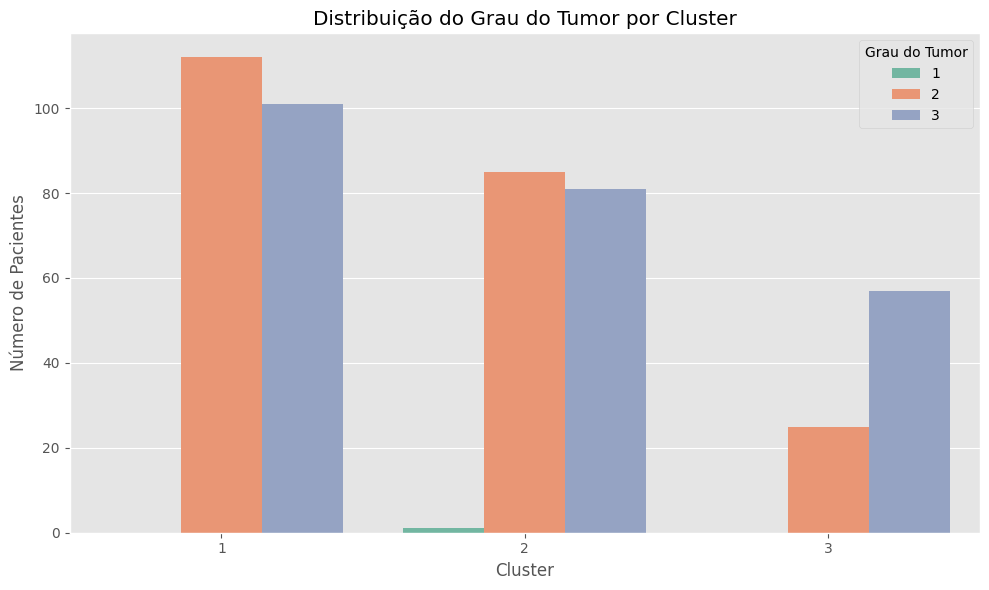

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3])]

plt.figure(figsize=(10,6))
sns.countplot(data=df_subset, x='cluster', hue='tumor_grade', palette='Set2')

plt.title("Distribuição do Grau do Tumor por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Número de Pacientes")
plt.legend(title="Grau do Tumor")
plt.tight_layout()
plt.show()

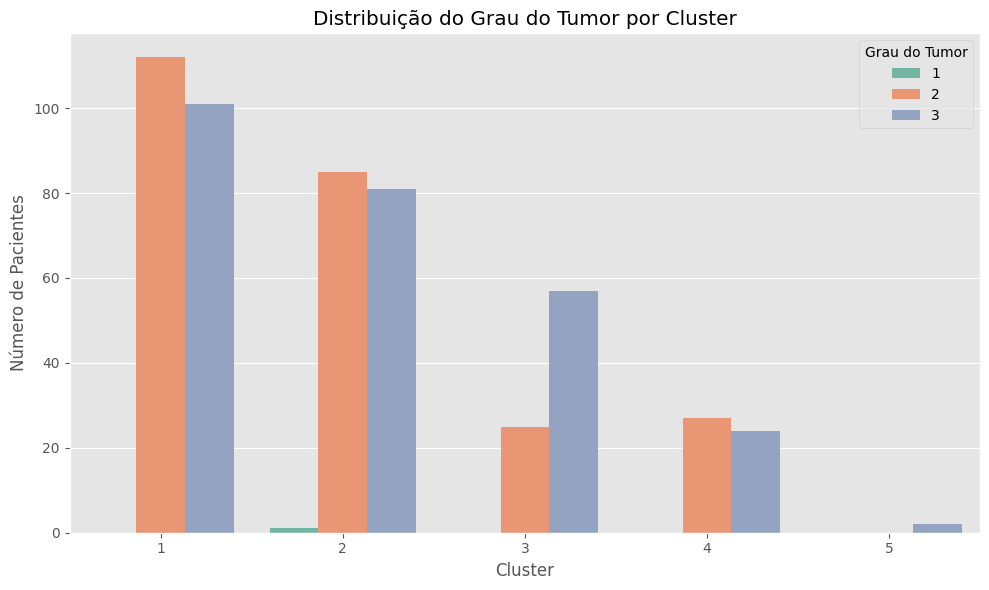

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3, 4, 5])]

plt.figure(figsize=(10,6))
sns.countplot(data=df_subset, x='cluster', hue='tumor_grade', palette='Set2')

plt.title("Distribuição do Grau do Tumor por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Número de Pacientes")
plt.legend(title="Grau do Tumor")
plt.tight_layout()
plt.show()

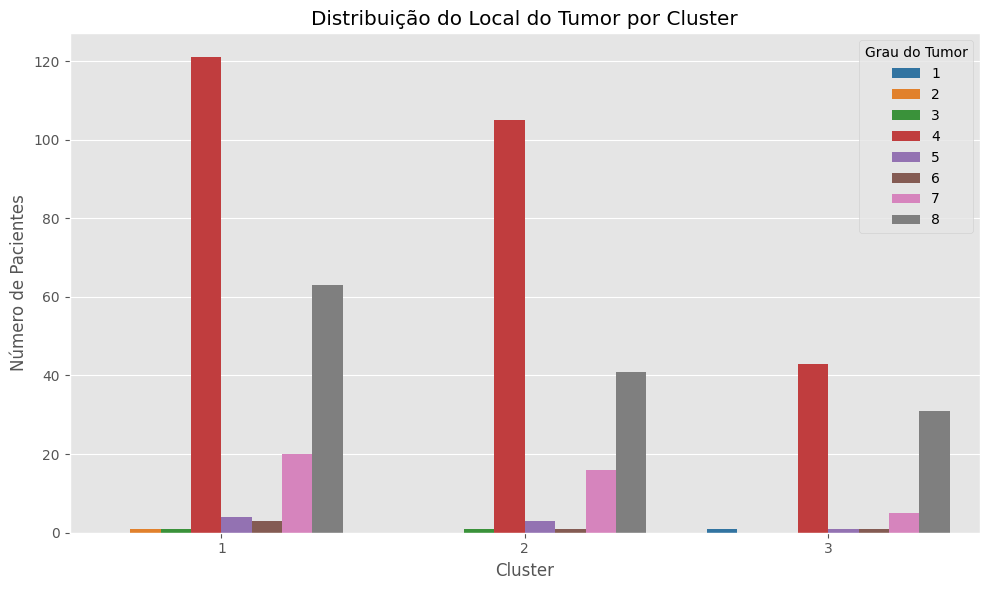

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3])]

plt.figure(figsize=(10,6))
sns.countplot(data=df_subset, x='cluster', hue='tumor_site', palette='tab10')

plt.title("Distribuição do Local do Tumor por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Número de Pacientes")
plt.legend(title="Grau do Tumor")
plt.tight_layout()
plt.show()

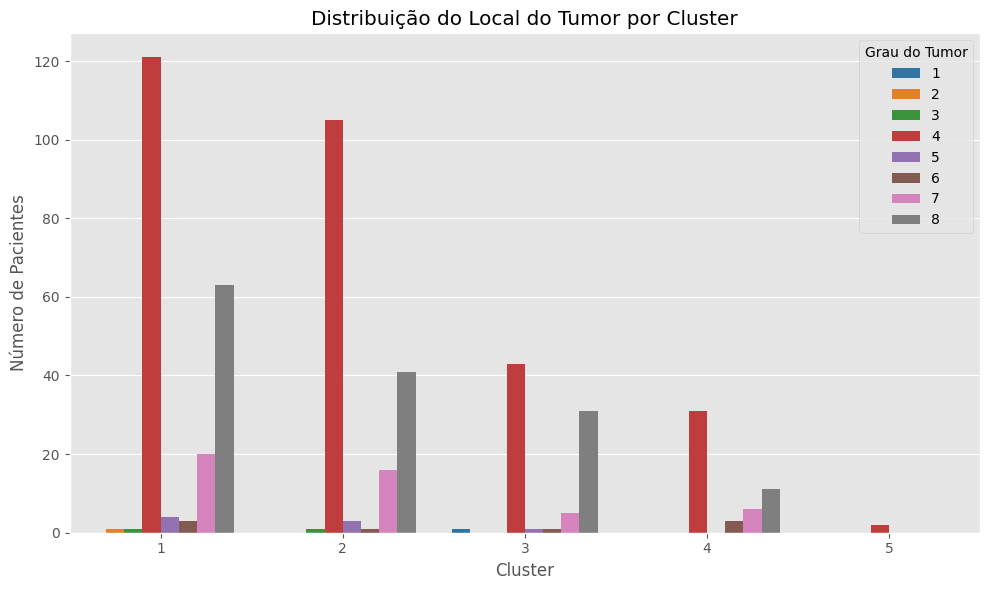

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3, 4, 5])]

plt.figure(figsize=(10,6))
sns.countplot(data=df_subset, x='cluster', hue='tumor_site', palette='tab10')

plt.title("Distribuição do Local do Tumor por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Número de Pacientes")
plt.legend(title="Grau do Tumor")
plt.tight_layout()
plt.show()

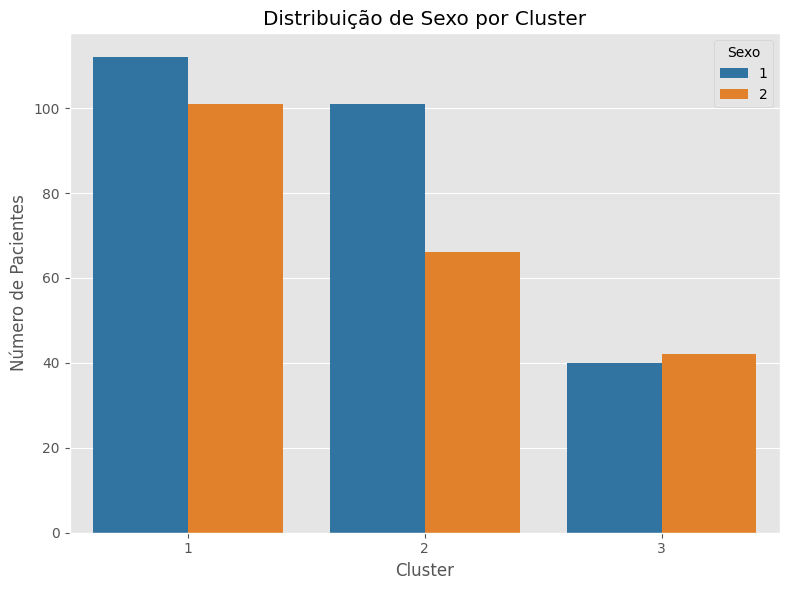

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3])]

plt.figure(figsize=(8,6))
sns.countplot(data=df_subset, x='cluster', hue='gender.y', palette='tab10')

plt.title("Distribuição de Sexo por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Número de Pacientes")
plt.legend(title="Sexo")
plt.tight_layout()
plt.show()

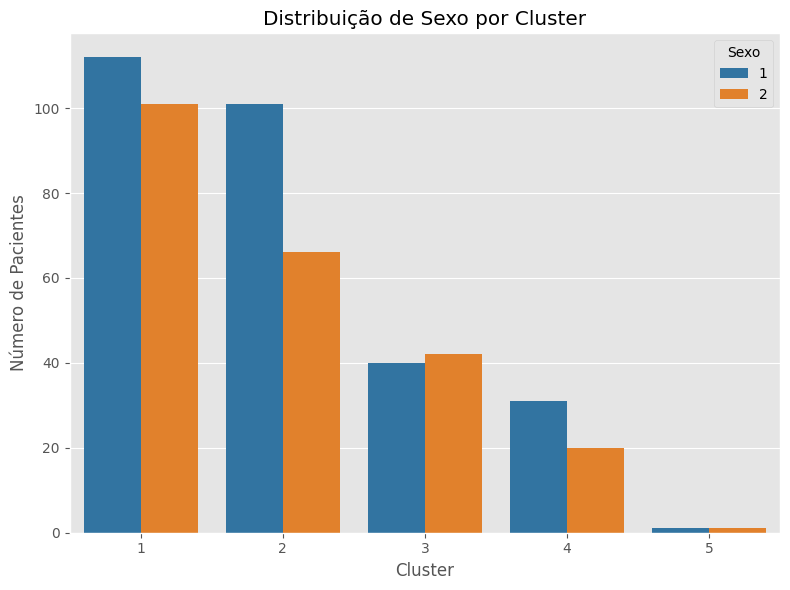

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3, 4, 5])]


plt.figure(figsize=(8,6))
sns.countplot(data=df_subset, x='cluster', hue='gender.y', palette='tab10')

plt.title("Distribuição de Sexo por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Número de Pacientes")
plt.legend(title="Sexo")
plt.tight_layout()
plt.show()

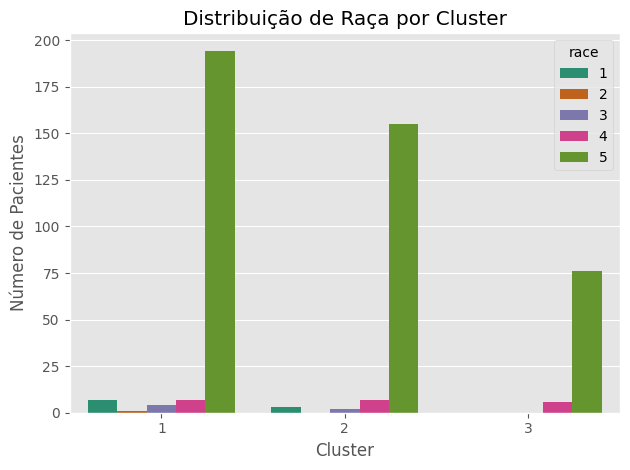

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3])]

sns.countplot(data=df_subset, x='cluster', hue='race', palette='Dark2')
plt.title("Distribuição de Raça por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Número de Pacientes")
plt.tight_layout()
plt.show()


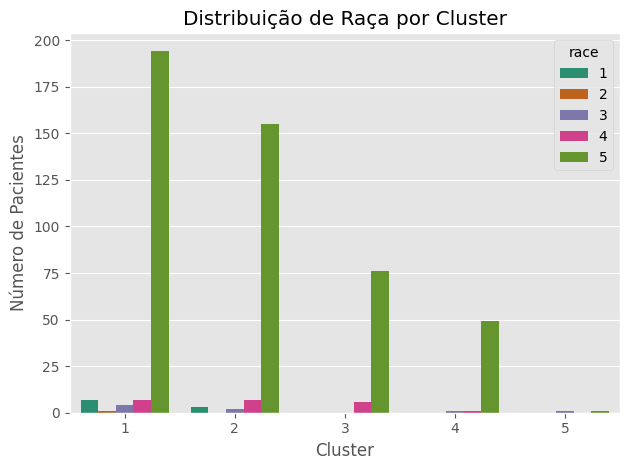

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3, 4, 5])]

sns.countplot(data=df_subset, x='cluster', hue='race', palette='Dark2')
plt.title("Distribuição de Raça por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Número de Pacientes")
plt.tight_layout()
plt.show()


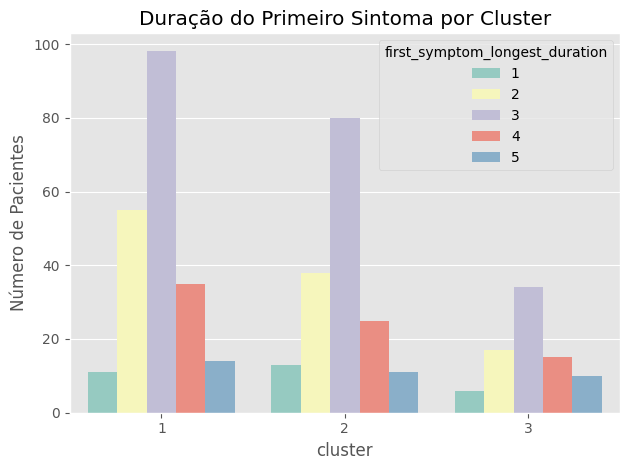

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3])]

sns.countplot(data=df_subset, x='cluster', hue='first_symptom_longest_duration', palette='Set3')
plt.title("Duração do Primeiro Sintoma por Cluster")
plt.ylabel("Número de Pacientes")
plt.tight_layout()
plt.show()

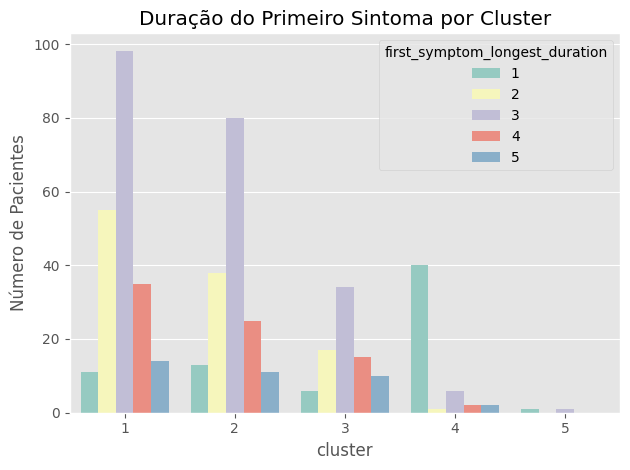

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3, 4, 5])]

sns.countplot(data=df_subset, x='cluster', hue='first_symptom_longest_duration', palette='Set3')
plt.title("Duração do Primeiro Sintoma por Cluster")
plt.ylabel("Número de Pacientes")
plt.tight_layout()
plt.show()

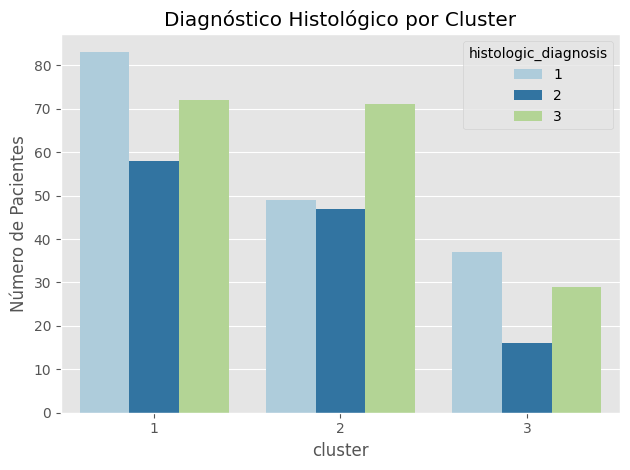

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3])]

sns.countplot(data=df_subset, x='cluster', hue='histologic_diagnosis', palette='Paired')
plt.title("Diagnóstico Histológico por Cluster")
plt.ylabel("Número de Pacientes")
plt.tight_layout()
plt.show()

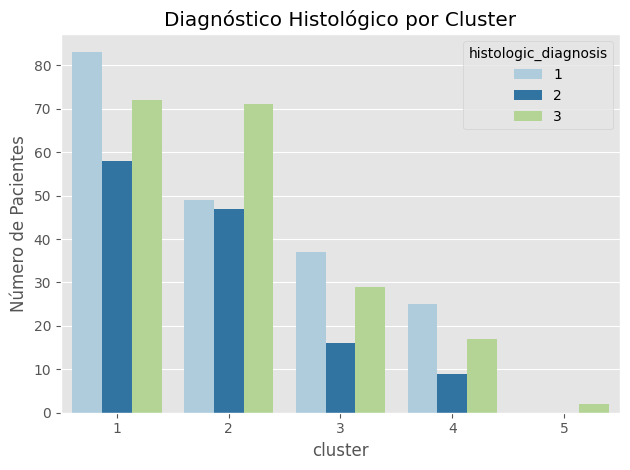

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3, 4, 5])]

sns.countplot(data=df_subset, x='cluster', hue='histologic_diagnosis', palette='Paired')
plt.title("Diagnóstico Histológico por Cluster")
plt.ylabel("Número de Pacientes")
plt.tight_layout()
plt.show()

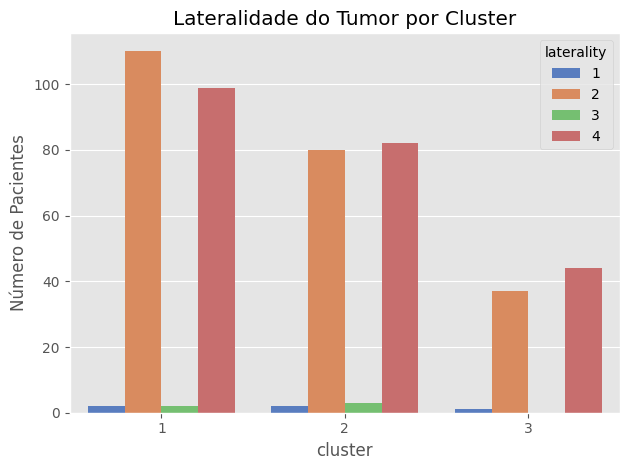

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3])]

sns.countplot(data=df_subset, x='cluster', hue='laterality', palette='muted')
plt.title("Lateralidade do Tumor por Cluster")
plt.ylabel("Número de Pacientes")
plt.tight_layout()
plt.show()

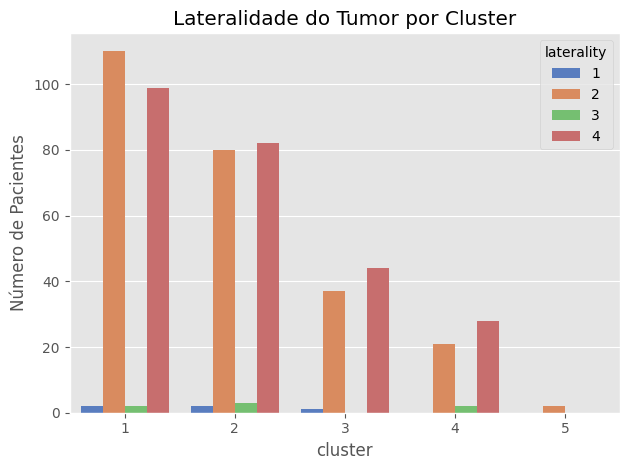

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3, 4, 5])]

sns.countplot(data=df_subset, x='cluster', hue='laterality', palette='muted')
plt.title("Lateralidade do Tumor por Cluster")
plt.ylabel("Número de Pacientes")
plt.tight_layout()
plt.show()

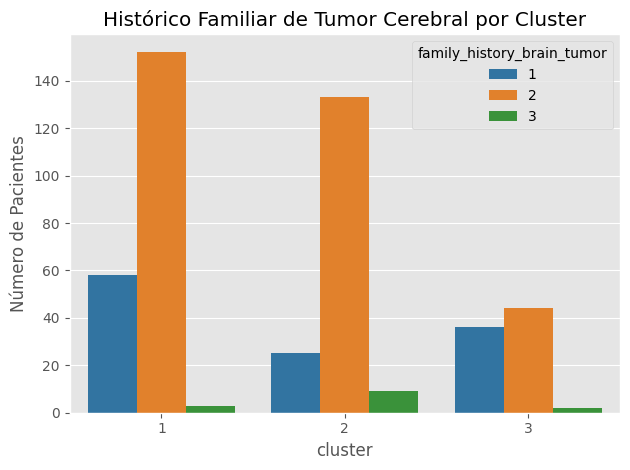

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3])]

sns.countplot(data=df_subset, x='cluster', hue='family_history_brain_tumor', palette='tab10')
plt.title("Histórico Familiar de Tumor Cerebral por Cluster")
plt.ylabel("Número de Pacientes")
plt.tight_layout()
plt.show()

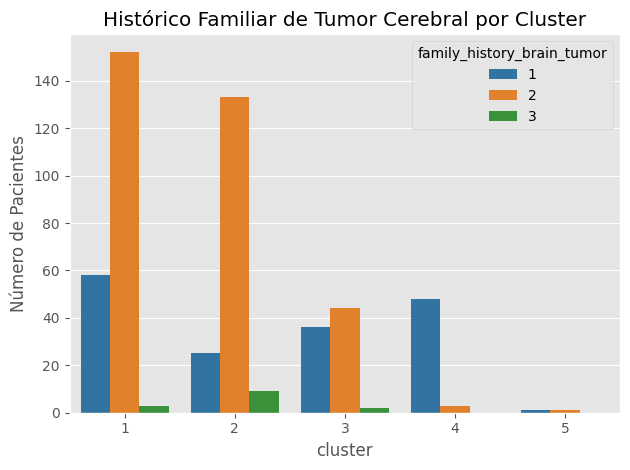

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3, 4, 5])]

sns.countplot(data=df_subset, x='cluster', hue='family_history_brain_tumor', palette='tab10')
plt.title("Histórico Familiar de Tumor Cerebral por Cluster")
plt.ylabel("Número de Pacientes")
plt.tight_layout()
plt.show()

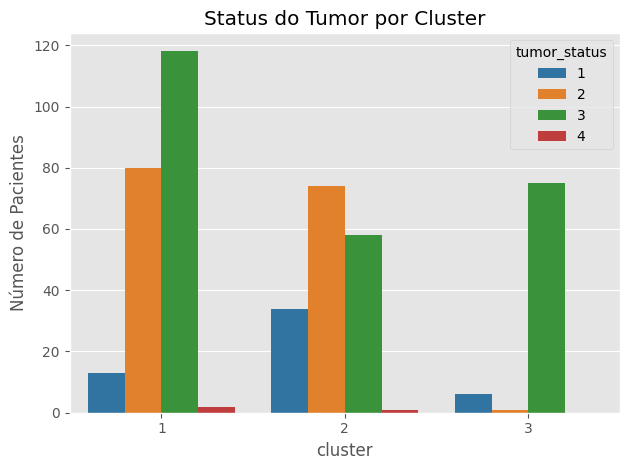

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3])]

sns.countplot(data=df_subset, x='cluster', hue='tumor_status', palette='tab10')
plt.title("Status do Tumor por Cluster")
plt.ylabel("Número de Pacientes")
plt.tight_layout()
plt.show()

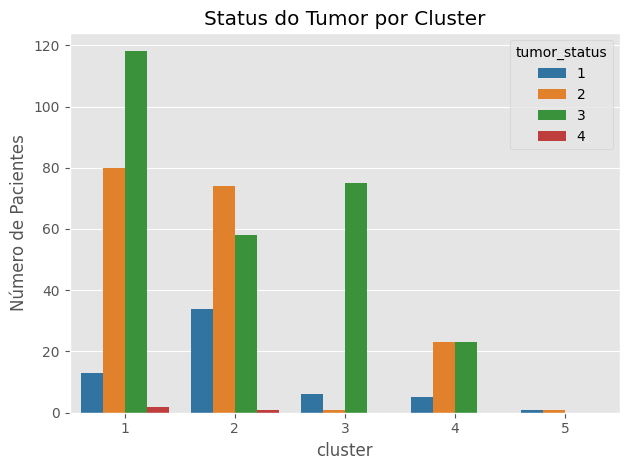

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3, 4, 5])]

sns.countplot(data=df_subset, x='cluster', hue='tumor_status', palette='tab10')
plt.title("Status do Tumor por Cluster")
plt.ylabel("Número de Pacientes")
plt.tight_layout()
plt.show()

/tmp/ipython-input-31-2155523235.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_subset, x='cluster', y='death_days_to', palette='pastel')


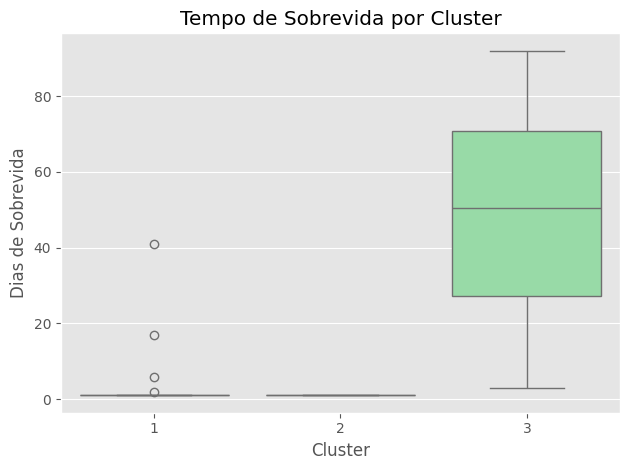

In [ ]:
# Filtra apenas os clusters desejados
df_subset = df[df['cluster'].isin([1, 2, 3])]

sns.boxplot(data=df_subset, x='cluster', y='death_days_to', palette='pastel')
plt.title("Tempo de Sobrevida por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Dias de Sobrevida")
plt.tight_layout()
plt.show()


MUDAR



/tmp/ipython-input-32-1116075178.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_subset, x='cluster', y='last_contact_days_to', palette='pastel')


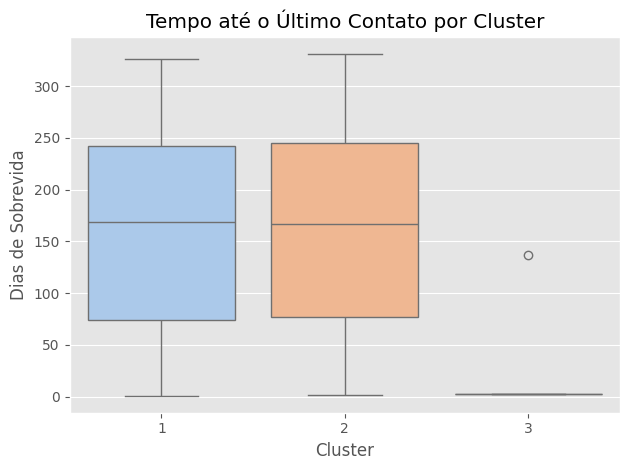

In [ ]:
sns.boxplot(data=df_subset, x='cluster', y='last_contact_days_to', palette='pastel')
plt.title("Tempo até o Último Contato por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Dias de Sobrevida")
plt.tight_layout()
plt.show()


/tmp/ipython-input-33-569760558.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_subset, x='cluster', y='last_contact_days_to', palette='pastel')


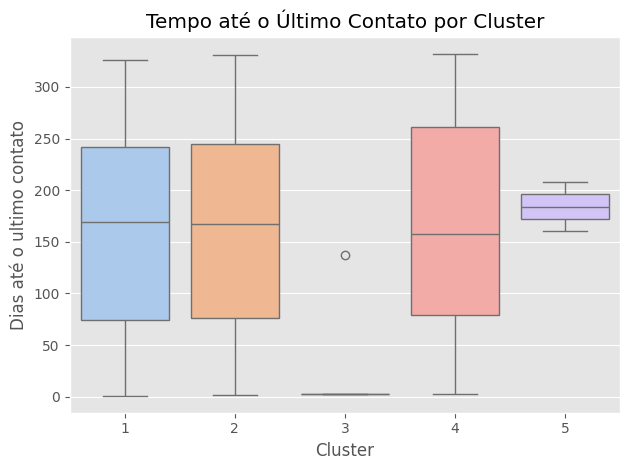

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3, 4, 5])]

df_subset['cluster'] = df_subset['cluster'].astype(int)

df_subset = df_subset.sort_values('cluster')
# Plot
sns.boxplot(data=df_subset, x='cluster', y='last_contact_days_to', palette='pastel')
plt.title("Tempo até o Último Contato por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Dias até o ultimo contato")
plt.tight_layout()
plt.show()


/tmp/ipython-input-34-2595354783.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_subset, x='cluster', y='death_days_to', palette='pastel')


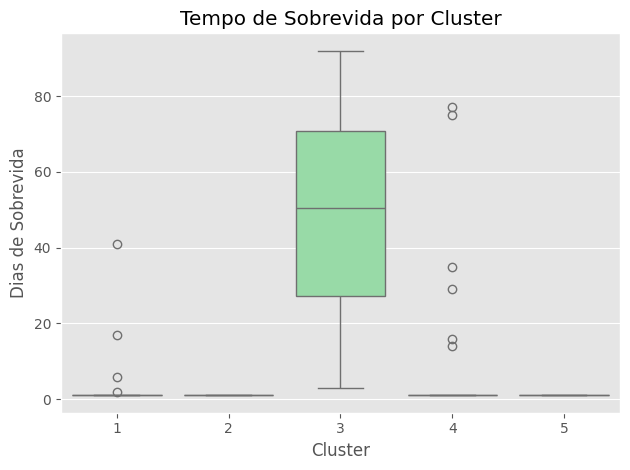

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3, 4, 5])]

sns.boxplot(data=df_subset, x='cluster', y='death_days_to', palette='pastel')
plt.title("Tempo de Sobrevida por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Dias de Sobrevida")
plt.tight_layout()
plt.show()


In [ ]:
# Médias
print(df[df['cluster'].isin([1,2,3])].groupby('cluster')[['age_at_initial_pathologic_diagnosis', 'death_days_to']].mean())

# Sobrevivência categórica
print(df[df['cluster'].isin([1,2,3])].groupby('cluster')['survival_status'].value_counts(normalize=True))

# Tumor grade
print(df[df['cluster'].isin([1,2,3])].groupby('cluster')['tumor_grade'].value_counts(normalize=True))


         age_at_initial_pathologic_diagnosis  death_days_to
cluster                                                    
1                                  27.084507       1.291080
2                                  26.820359       1.000000
3                                  32.865854      49.280488
cluster  survival_status 
1        Baixa (≤1 ano)      1.0
         Média (1-3 anos)    0.0
         Alta (>3 anos)      0.0
2        Baixa (≤1 ano)      1.0
         Média (1-3 anos)    0.0
         Alta (>3 anos)      0.0
3        Baixa (≤1 ano)      1.0
         Média (1-3 anos)    0.0
         Alta (>3 anos)      0.0
Name: proportion, dtype: float64
cluster  tumor_grade
1        2              0.525822
         3              0.474178
2        2              0.508982
         3              0.485030
         1              0.005988
3        3              0.695122
         2              0.304878
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import gdown
import scipy
import sklearn

print("Pandas:", pd.__version__)
print("NumPy:", np.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Seaborn:", sns.__version__)
print("Gdown:", gdown.__version__)
print("SciPy:", scipy.__version__)
print("Scikit-learn:", sklearn.__version__)


Pandas: 2.2.2
NumPy: 2.0.2
Matplotlib: 3.10.0
Seaborn: 0.13.2
Gdown: 5.2.0
SciPy: 1.15.3
Scikit-learn: 1.6.1


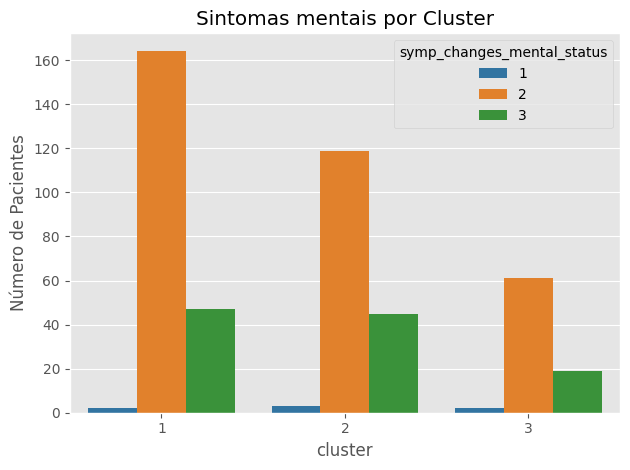

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3])]

sns.countplot(data=df_subset, x='cluster', hue='symp_changes_mental_status', palette='tab10')
plt.title("Sintomas mentais por Cluster")
plt.ylabel("Número de Pacientes")
plt.tight_layout()
plt.show()

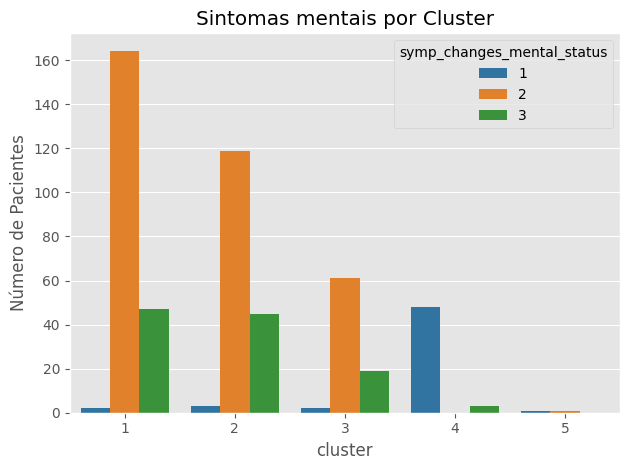

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3, 4, 5])]

sns.countplot(data=df_subset, x='cluster', hue='symp_changes_mental_status', palette='tab10')
plt.title("Sintomas mentais por Cluster")
plt.ylabel("Número de Pacientes")
plt.tight_layout()
plt.show()

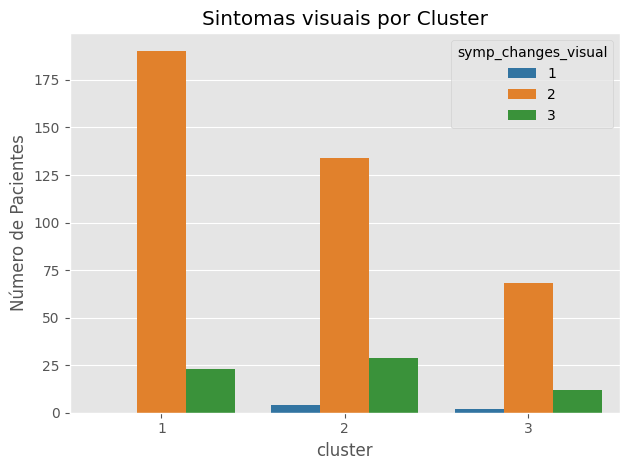

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3])]

sns.countplot(data=df_subset, x='cluster', hue='symp_changes_visual', palette='tab10')
plt.title("Sintomas visuais por Cluster")
plt.ylabel("Número de Pacientes")
plt.tight_layout()
plt.show()

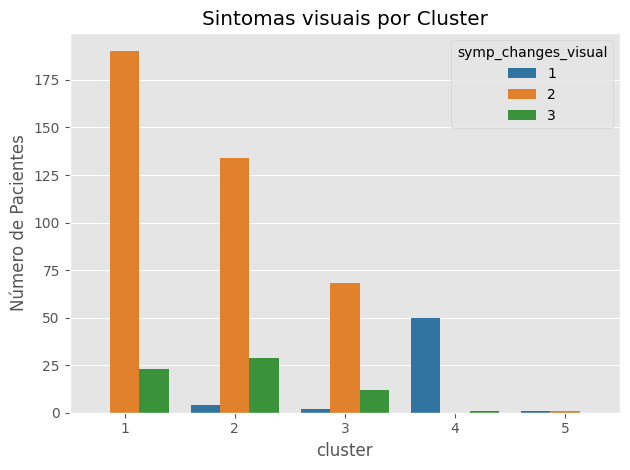

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3, 4, 5])]

sns.countplot(data=df_subset, x='cluster', hue='symp_changes_visual', palette='tab10')
plt.title("Sintomas visuais por Cluster")
plt.ylabel("Número de Pacientes")
plt.tight_layout()
plt.show()

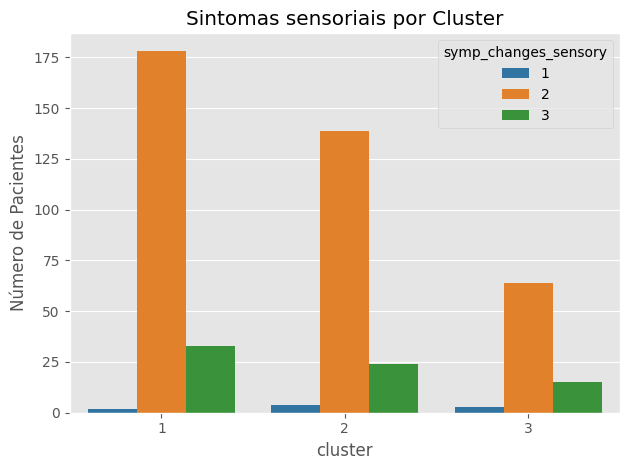

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3])]

sns.countplot(data=df_subset, x='cluster', hue='symp_changes_sensory', palette='tab10')
plt.title("Sintomas sensoriais por Cluster")
plt.ylabel("Número de Pacientes")
plt.tight_layout()
plt.show()

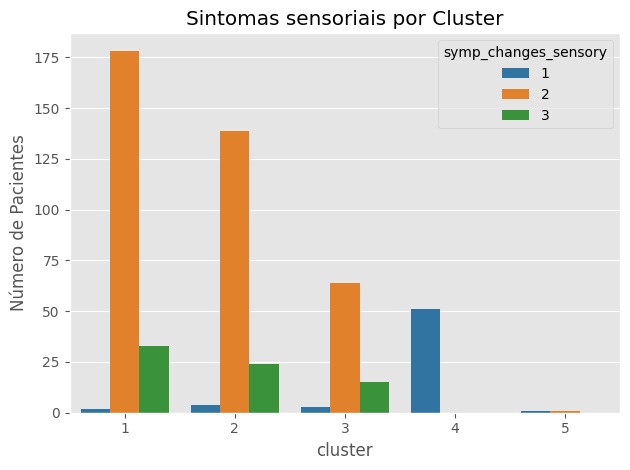

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3, 4, 5])]

sns.countplot(data=df_subset, x='cluster', hue='symp_changes_sensory', palette='tab10')
plt.title("Sintomas sensoriais por Cluster")
plt.ylabel("Número de Pacientes")
plt.tight_layout()
plt.show()

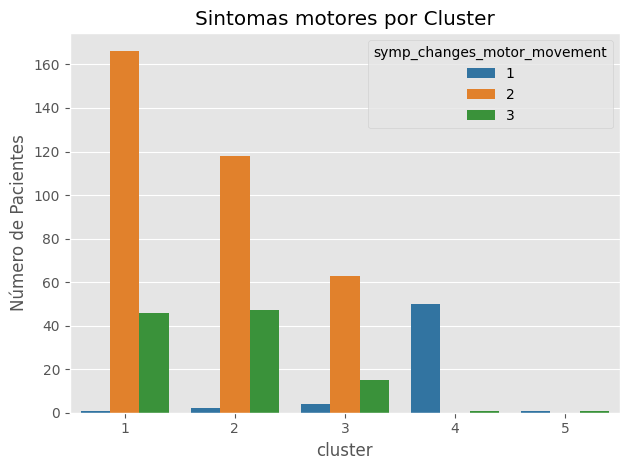

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3, 4, 5])]

sns.countplot(data=df_subset, x='cluster', hue='symp_changes_motor_movement', palette='tab10')
plt.title("Sintomas motores por Cluster")
plt.ylabel("Número de Pacientes")
plt.tight_layout()
plt.show()

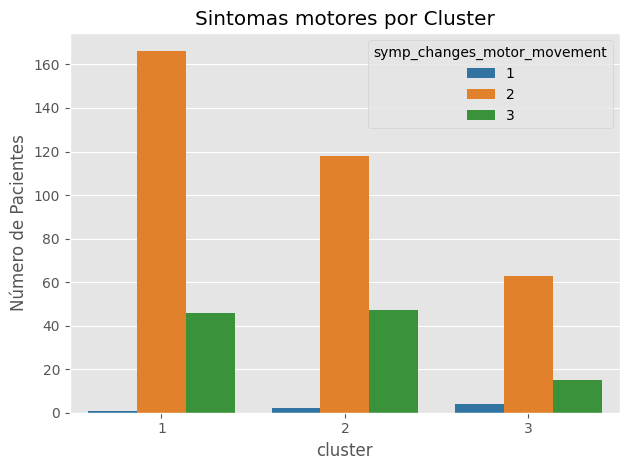

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3])]

sns.countplot(data=df_subset, x='cluster', hue='symp_changes_motor_movement', palette='tab10')
plt.title("Sintomas motores por Cluster")
plt.ylabel("Número de Pacientes")
plt.tight_layout()
plt.show()

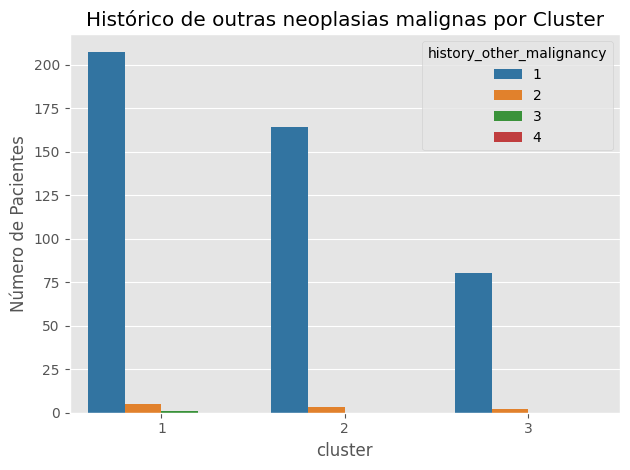

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3])]

order = [1, 2, 3, 4]

sns.countplot(data=df_subset, x='cluster', hue='history_other_malignancy', hue_order=order, palette='tab10')
plt.title("Histórico de outras neoplasias malignas por Cluster")
plt.ylabel("Número de Pacientes")
plt.tight_layout()
plt.show()

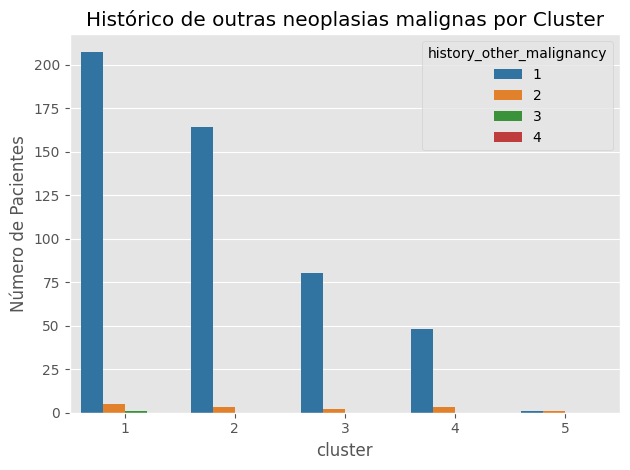

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3, 4, 5])]

order = [1, 2, 3, 4]

sns.countplot(data=df_subset, x='cluster', hue='history_other_malignancy', hue_order=order, palette='tab10')
plt.title("Histórico de outras neoplasias malignas por Cluster")
plt.ylabel("Número de Pacientes")
plt.tight_layout()
plt.show()

/tmp/ipython-input-47-247256266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_subset, x='cluster', y='count_days', palette='Set2')


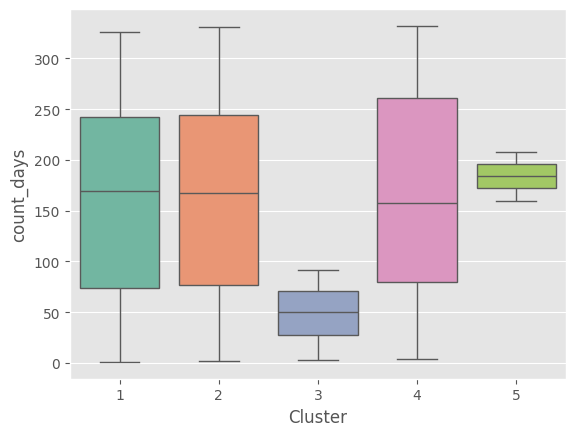

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3,4,5])]

# Gráfico de boxplot para ver a distribuição de count_days por cluster
sns.boxplot(data=df_subset, x='cluster', y='count_days', palette='Set2')
plt.xlabel('Cluster')
plt.ylabel('count_days')
plt.show()


In [ ]:
faixas = df_subset.groupby('cluster')['count_days'].agg(['min', 'max'])
print(faixas)


         min  max
cluster          
1          1  326
2          2  331
3          3   92
4          4  332
5        160  208


/tmp/ipython-input-49-3320745394.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_subset, x='cluster', y='count_days', palette='Set2')


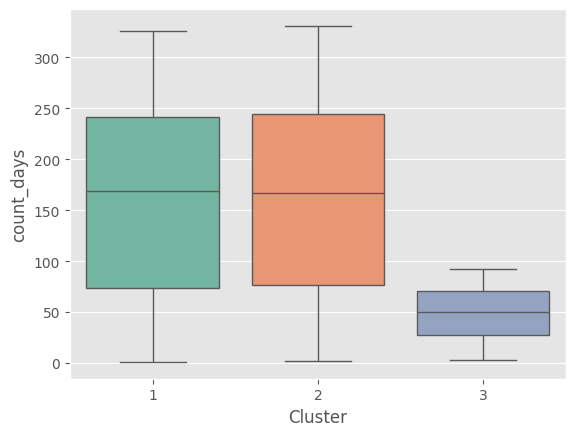

In [ ]:
df_subset = df[df['cluster'].isin([1, 2, 3])]

# Gráfico de boxplot para ver a distribuição de count_days por cluster
sns.boxplot(data=df_subset, x='cluster', y='count_days', palette='Set2')
plt.xlabel('Cluster')
plt.ylabel('count_days')
plt.show()
